# LAB 1: ANN and PyTorch

In this lab, you will start off by constructing a neural networks from scratch to get a stronger understanding of what is required to make neural networks work.

Then in the second part of the lab you will train a neural network (using PyTorch) to classify an image into one of two classes: "car" or "truck". The code for the neural networks 
you train will be written for you, and you are not (yet!) expected
to understand all provided code. However, by the end of the lab,
you should be able to:

1. Understand at a high level the training loop for a machine learning model.
2. Understand the distinction between training, validation, and test data.
3. The concepts of overfitting and underfitting.
4. Investigate how different hyperparameters, such as learning rate and batch size, affect the success of training.
5. Compare an ANN (aka Multi-Layer Perceptron) with a CNN.

### What to submit

Submit an HTML file containing all your code, outputs, and write-up
from parts A and B. You can produce a HTML file directly from Google Colab. The Colab instructions are provided at the end of this document.

**Do not submit any other files produced by your code.**

Include a link to your colab file in your submission.

Please use Google Colab to complete this assignment. If you want to use Jupyter Notebook, please complete the assignment and upload your Jupyter Notebook file to Google Colab for submission. 

## Colab Link

Include a link to your colab file here

Colab Link: https://colab.research.google.com/drive/1CZ-ZofGkVfTUV2deY5ytuwkbLl43wCVI?usp=sharing

#PART A: Constructing a Neural Network [15 pt]

Before we get into using PyTorch to train our classifier we will go through the process of creating our neural network from scratch. We've seen in the tutorial how to build a 1-layer network, now we'll take it one step further to build a 2-layer network. This is an important exercise that everyone should attempt at least once to understand and truly appreciate the workings of neural networks.

## Part 0. Helper Functions

To help guide the construction we will use the iris dataset that was introduced in the tutorial. Provided are some helper code to get us started:

In [ ]:
# load "Iris_3class.csv" to Google Colab
from google.colab import files
uploaded = files.upload()

Saving Iris_3class.csv to Iris_3class.csv


In [ ]:
import pandas as pd
raw_data = pd.read_csv("Iris_3class.csv", header = None)
raw_data.values.shape

(150, 5)

In [ ]:
raw_data.values

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ],
       [5.4, 3.9, 1.7, 0.4, 0. ],
       [4.6, 3.4, 1.4, 0.3, 0. ],
       [5. , 3.4, 1.5, 0.2, 0. ],
       [4.4, 2.9, 1.4, 0.2, 0. ],
       [4.9, 3.1, 1.5, 0.1, 0. ],
       [5.4, 3.7, 1.5, 0.2, 0. ],
       [4.8, 3.4, 1.6, 0.2, 0. ],
       [4.8, 3. , 1.4, 0.1, 0. ],
       [4.3, 3. , 1.1, 0.1, 0. ],
       [5.8, 4. , 1.2, 0.2, 0. ],
       [5.7, 4.4, 1.5, 0.4, 0. ],
       [5.4, 3.9, 1.3, 0.4, 0. ],
       [5.1, 3.5, 1.4, 0.3, 0. ],
       [5.7, 3.8, 1.7, 0.3, 0. ],
       [5.1, 3.8, 1.5, 0.3, 0. ],
       [5.4, 3.4, 1.7, 0.2, 0. ],
       [5.1, 3.7, 1.5, 0.4, 0. ],
       [4.6, 3.6, 1. , 0.2, 0. ],
       [5.1, 3.3, 1.7, 0.5, 0. ],
       [4.8, 3.4, 1.9, 0.2, 0. ],
       [5. , 3. , 1.6, 0.2, 0. ],
       [5. , 3.4, 1.6, 0.4, 0. ],
       [5.2, 3.5, 1.5, 0.2, 0. ],
       [5.2, 3.4, 1.4, 0.2, 0. ],
       [4.7, 3

In [ ]:
import numpy as np
raw_data = raw_data.values

X_train = raw_data[:,:4]
y_train = raw_data[:,4:5].astype(int) 
print(X_train.shape, y_train.shape)
print(X_train.dtype, y_train.dtype)

(150, 4) (150, 1)
float64 int64


Recall that the neural network output consists of several nodes, one for each output class. Since the labels are provided as integers we will need to convert them into one-hot vectors to match the neural network output format.

In [ ]:
#Convert array to one-hot encoding
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

In [ ]:
y_train = to_one_hot(y_train)
print(X_train.shape, y_train.shape)
print(X_train.dtype, y_train.dtype)

(150, 4) (150, 3)
float64 float64


In [ ]:
#verify one-hot encoding
y_train[0:5,:]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

### Part 1. Develop a 2-layer ANN [5 pt]
At its core a 2-layer neural network is just a few lines of code. Most of the complexity comes from setting up the training of the network.

Using vectorized form, set up the neural network training to use a cross-entropy loss function and determine the gradients with resepect to the layer 1 and layer 2 weights.

In [ ]:
# write code to create a 2-layer ANN in vectorized form

#define sigmoid
def sigmoid(x):
    return 1/(1+np.exp(-x))

def ann(W, X_train, y_train):

  num_hidden = 5
  num_features = 4
  num_outputs = 3

  #Weights
  w0 = W[:20].reshape(num_features, num_hidden)
  w1 = W[20:].reshape(num_hidden, num_outputs)

  #Feed forward
  layer0 = X_train
  layer1 = sigmoid(np.dot(layer0, w0))
  layer2 = np.dot(layer1, w1) 
  
  # softmax
  output = np.exp(layer2)/np.sum(np.exp(layer2), axis=1, keepdims=True) 
 

  #Back propagation using gradient descent
  
  #cross-entropy loss
  error = -np.sum((y_train * np.log(output))/output.shape[0])  
  #-y_train * np.log(output) - (1-y_train) * np.log(1 - output)

  #initialize gradients to zero
  dw0, dw1 = 0 , 0

  #Cross-entropy and softmax derivation
  ce_der = output - y_train  

  #calculate partial derivatives
  #For layer1
  gradient1 = np.dot(layer1.T, ce_der)
 
 #For layer2
  gradient0 = np.dot(layer0.T, (sigmoid(np.dot(layer0, w0)) * (1 - sigmoid(np.dot(layer0, w0))) * np.dot(ce_der, w1.T)))
   
  #determine gradients
  dw1 += gradient1
  dw0 += gradient0
  
  #combine gradients into one vector
  dW = np.array(list(dw0.flatten()) + list(dw1.flatten()))
 

  return (error, dW, output)


### Part 2. Train your neural network. How well does your network work on the iris dataset? [5 pt]

In [ ]:
num_hidden = 5
num_features = 4
num_outputs = 3
  
#initialize weights
w0 = 2*np.random.random((num_features, num_hidden)) - 1
w1 = 2*np.random.random((num_hidden, num_outputs)) - 1

#combine weights into a single vector
W = np.array(list(w0.flatten()) + list(w1.flatten()))
#print('This is the W',W.shape)

#train network
n = 0.001
iterations = 100000
errors = []
for i in range(iterations):
  (error, dW, y_pred) = ann(W, X_train, y_train)
  W += -dW * n 
  errors.append(error)


In [ ]:
#examine predictions on training data
np.round(y_pred, 1)


array([[1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. 

### Part 3. Validate that the gradients were computed correctly for the 2-layer neural network you developed. [5 pt]

In [ ]:
#write code to numerical verify the gradients you calculated

num_hidden = 5
num_features = 4
num_outputs = 3
  
#initialize weights
w0 = 2*np.random.random((num_features, num_hidden)) - 1
w1 = 2*np.random.random((num_hidden, num_outputs)) - 1

#combine weights
W = np.array(list(w0.flatten()) + list(w1.flatten()))

#compute gradients analytically
(error, dW, y_pred) = ann(W, X_train, y_train)

#compute gradients numerically
dW_num = np.zeros((len(W),1))

for ind in range(len(W)):
  #reset gradients
  We1 = np.array(list(w0.flatten()) + list(w1.flatten()))
  We2 = np.array(list(w0.flatten()) + list(w1.flatten()))
  
  #increment slightly
  We1[ind] += 0.0001 
  We2[ind] -= 0.0001 
  
  #compute errors
  (error_e1, dW_e1, y_pred1) = ann(We1, X_train, y_train)
  (error_e2, dW_e2, y_pred2) = ann(We2, X_train, y_train)
  
  #obtain numerical gradients
  grad_num = (error_e1 - error_e2)/(dW_e1 - dW_e2)
  
  #display difference between numerical and analytic gradients
  print(np.round(abs(grad_num - dW[ind]), 4), grad_num, dW[ind])


[10.7663 10.7861 10.7598 10.8936 10.6157 10.7672 10.7957 10.7573 10.992
 10.4795 10.7669 10.8366 10.7471 11.0045 10.5324 10.7701 11.1958 10.6602
 11.5956 10.0191 10.77   10.8239 10.7607 10.7719 10.7938 10.7598 10.784
 10.8305 10.7506 10.7714 10.7913 10.7602 10.7719 10.7926 10.7598] [-0.00107049 -0.02088021  0.00539143 -0.12843399  0.14953264 -0.00196484
 -0.03051101  0.00791805 -0.22681591  0.28573328 -0.00166709 -0.07137601
  0.0181083  -0.23929224  0.23280792 -0.00492758 -0.43059362  0.10500836
 -0.8303887   0.74606318 -0.00485362 -0.05867053  0.00448278 -0.00667193
 -0.02861419  0.0054104  -0.01881124 -0.06528862  0.01460359 -0.00621385
 -0.02613431  0.00502022 -0.0066691  -0.02745381  0.00536567] 10.76519212383281
[6.5646 6.5503 6.5815 5.9941 6.6595 6.5705 6.5496 6.5944 5.6989 6.7148
 6.5954 6.5458 6.6566 4.9516 6.8588 6.814  6.5067 7.1882 1.3246 8.0575
 6.5356 6.5955 6.578  6.5596 6.5385 6.5341 6.5226 6.6313 6.5984 6.5401
 6.5824 6.5711 6.5395 6.5842 6.5721] [ 1.27081127e-02 -1.59

# PART B: Cars vs Trucks [35 pt]

In the second part of the lab we will see how we can use PyTorch to train a neural network to identify Cars and Trucks.

In [ ]:
import numpy as np
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision.transforms as transforms


## Part 0. Helper Functions

We will be making use of the following helper functions. You will be asked to look
at and possibly modify some of these, but you are not expected to understand all of them.

You should look at the function names and read the docstrings. If you are curious, come back and explore the code *after* making some progress on the lab.

In [ ]:
###############################################################################
# Data Loading

def get_relevant_indices(dataset, classes, target_classes):
    """ Return the indices for datapoints in the dataset that belongs to the
    desired target classes, a subset of all possible classes.

    Args:
        dataset: Dataset object
        classes: A list of strings denoting the name of each class
        target_classes: A list of strings denoting the name of desired classes
                        Should be a subset of the 'classes'
    Returns:
        indices: list of indices that have labels corresponding to one of the
                 target classes
    """
    indices = []
    for i in range(len(dataset)):
        # Check if the label is in the target classes
        label_index = dataset[i][1] # ex: 9
        label_class = classes[label_index] # ex: 'truck'
        if label_class in target_classes:
            indices.append(i)
    return indices

def get_data_loader(target_classes, batch_size):
    """ Loads images of cars and trucks, splits the data into training, validation
    and testing datasets. Returns data loaders for the three preprocessed datasets.

    Args:
        target_classes: A list of strings denoting the name of the desired
                        classes. Should be a subset of the argument 'classes'
        batch_size: A int representing the number of samples per batch
    
    Returns:
        train_loader: iterable training dataset organized according to batch size
        val_loader: iterable validation dataset organized according to batch size
        test_loader: iterable testing dataset organized according to batch size
        classes: A list of strings denoting the name of each class
    """

    classes = ('plane', 'car', 'bird', 'cat',
               'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
    ########################################################################
    # The output of torchvision datasets are PILImage images of range [0, 1].
    # We transform them to Tensors of normalized range [-1, 1].
    transform = transforms.Compose(
        [transforms.ToTensor(),
         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
    # Load CIFAR10 training data
    trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                            download=True, transform=transform)
    # Get the list of indices to sample from
    relevant_indices = get_relevant_indices(trainset, classes, target_classes)
    
    # Split into train and validation
    np.random.seed(1000) # Fixed numpy random seed for reproducible shuffling
    np.random.shuffle(relevant_indices)
    print(relevant_indices)
    split = int(len(relevant_indices) * 0.8) #split at 80%
    print(len(relevant_indices))
    
    # split into training and validation indices
    relevant_train_indices, relevant_val_indices = relevant_indices[:split], relevant_indices[split:]  
    train_sampler = SubsetRandomSampler(relevant_train_indices)
    train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                               num_workers=1, sampler=train_sampler)
    val_sampler = SubsetRandomSampler(relevant_val_indices)
    val_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                              num_workers=1, sampler=val_sampler)
    # Load CIFAR10 testing data
    testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                           download=True, transform=transform)
    # Get the list of indices to sample from
    relevant_test_indices = get_relevant_indices(testset, classes, target_classes)
    print('this is the test indices', len(relevant_test_indices))
    test_sampler = SubsetRandomSampler(relevant_test_indices)
    test_loader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                             num_workers=1, sampler=test_sampler)
    print(len(test_loader))
    return train_loader, val_loader, test_loader, classes

###############################################################################
# Training
def get_model_name(name, batch_size, learning_rate, epoch):
    """ Generate a name for the model consisting of all the hyperparameter values

    Args:
        config: Configuration object containing the hyperparameters
    Returns:
        path: A string with the hyperparameter name and value concatenated
    """
    path = "model_{0}_bs{1}_lr{2}_epoch{3}".format(name,
                                                   batch_size,
                                                   learning_rate,
                                                   epoch)
    return path

def normalize_label(labels):
    """
    Given a tensor containing 2 possible values, normalize this to 0/1

    Args:
        labels: a 1D tensor containing two possible scalar values
    Returns:
        A tensor normalize to 0/1 value
    """
    max_val = torch.max(labels)
    min_val = torch.min(labels)
    norm_labels = (labels - min_val)/(max_val - min_val)
    return norm_labels

def evaluate(net, loader, criterion):
    """ Evaluate the network on the validation set.

     Args:
         net: PyTorch neural network object
         loader: PyTorch data loader for the validation set
         criterion: The loss function
     Returns:
         err: A scalar for the avg classification error over the validation set
         loss: A scalar for the average loss function over the validation set
     """
    total_loss = 0.0
    total_err = 0.0
    total_epoch = 0
    for i, data in enumerate(loader, 0):
        inputs, labels = data
        labels = normalize_label(labels)  # Convert labels to 0/1
        outputs = net(inputs)
        loss = criterion(outputs, labels.float())
        corr = (outputs > 0.0).squeeze().long() != labels
        total_err += int(corr.sum())
        total_loss += loss.item()
        total_epoch += len(labels)
    err = float(total_err) / total_epoch
    loss = float(total_loss) / (i + 1)
    return err, loss

###############################################################################
# Training Curve
def plot_training_curve(path):
    """ Plots the training curve for a model run, given the csv files
    containing the train/validation error/loss.

    Args:
        path: The base path of the csv files produced during training
    """
    import matplotlib.pyplot as plt
    train_err = np.loadtxt("{}_train_err.csv".format(path))
    val_err = np.loadtxt("{}_val_err.csv".format(path))
    train_loss = np.loadtxt("{}_train_loss.csv".format(path))
    val_loss = np.loadtxt("{}_val_loss.csv".format(path))
    plt.title("Train vs Validation Error")
    n = len(train_err) # number of epochs
    plt.plot(range(1,n+1), train_err, label="Train")
    plt.plot(range(1,n+1), val_err, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Error")
    plt.legend(loc='best')
    plt.show()
    plt.title("Train vs Validation Loss")
    plt.plot(range(1,n+1), train_loss, label="Train")
    plt.plot(range(1,n+1), val_loss, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(loc='best')
    plt.show()

## Part 1. Visualizing the Data [5 pt]

We will make use of some of the CIFAR-10 data set, which consists of 
colour images of size 32x32 pixels belonging to 10 categories. You can
find out more about the dataset at https://www.cs.toronto.edu/~kriz/cifar.html

For this assignment, we will only be using the car and truck categories. 
We have included code that automatically downloads the dataset the 
first time that the main script is run.

In [ ]:
# This will download the CIFAR-10 dataset to a folder called "data"
# the first time you run this code.
train_loader, val_loader, test_loader, classes = get_data_loader(
    target_classes=["car", "truck"], 
    batch_size=1) # One image per batch

Files already downloaded and verified
[40283, 35688, 37979, 36837, 16491, 34923, 42210, 20336, 21894, 39855, 255, 27200, 15090, 28846, 6171, 23028, 17861, 7371, 14338, 4675, 15993, 27318, 49123, 40774, 40030, 40948, 26600, 15586, 30898, 18759, 46986, 26530, 12654, 32679, 43131, 4299, 35612, 37239, 12955, 40172, 17701, 36734, 44949, 45488, 28337, 18453, 10655, 14467, 2, 6819, 26852, 42102, 21242, 26509, 14776, 31324, 6709, 21583, 9744, 48662, 31399, 26347, 6043, 8058, 21795, 7324, 7692, 27307, 43235, 5971, 28552, 43552, 39735, 20781, 25759, 49065, 10850, 3273, 6736, 12822, 12002, 30412, 34533, 7374, 27791, 45059, 37799, 38822, 43636, 37849, 25389, 30804, 2656, 36179, 44088, 2637, 24693, 27442, 16226, 18654, 33228, 39340, 19523, 45126, 49816, 15209, 45961, 47435, 34134, 40936, 12531, 36118, 7262, 226, 32486, 22296, 31983, 18750, 35939, 8576, 7042, 42346, 24678, 30281, 9584, 7605, 37031, 49096, 8095, 24375, 15748, 45426, 2582, 12622, 3009, 24615, 18937, 643, 33778, 22605, 31524, 6286, 228

### Part (a) -- 1 pt

Visualize some of the data by running the code below.
Include the visualization in your writeup.

(You don't need to submit anything else.)

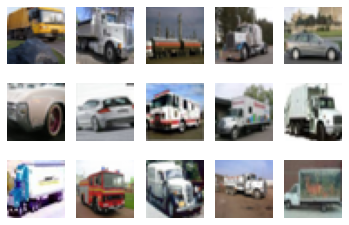

In [ ]:
import matplotlib.pyplot as plt

k = 0
for images, labels in train_loader:
    # since batch_size = 1, there is only 1 image in `images`
    image = images[0]
    # place the colour channel at the end, instead of at the beginning
    img = np.transpose(image, [1,2,0])
    # normalize pixel intensity values to [0, 1]
    img = img / 2 + 0.5
    plt.subplot(3, 5, k+1)
    plt.axis('off')
    plt.imshow(img)

    k += 1
    if k > 14:
        break

### Part (b) -- 2 pt

How many training examples do we have for the combined `car` and `truck` classes? 
What about validation examples? 
What about test examples?

There are a total of 10,000 training samples taking both cars and trucks. The training set is divided into 80%-20% split into training and validation set respectively. So there are 2000 samples for the validation set. There are 2000 test samples as well. 

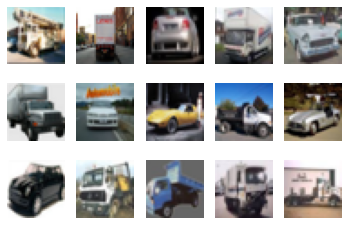

In [ ]:
#Visualization of Validation set
k = 0
for images, labels in val_loader:
    # since batch_size = 1, there is only 1 image in `images`
    image = images[0]
    # place the colour channel at the end, instead of at the beginning
    img = np.transpose(image, [1,2,0])
    # normalize pixel intensity values to [0, 1]
    img = img / 2 + 0.5
    plt.subplot(3, 5, k+1)
    plt.axis('off')
    plt.imshow(img)

    k += 1
    if k > 14:
        break

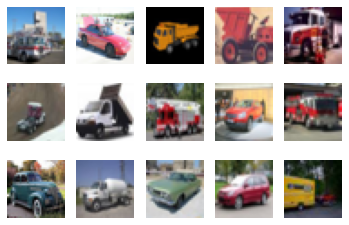

In [ ]:
#Visualization of Test set
k = 0
for images, labels in test_loader:
    # since batch_size = 1, there is only 1 image in `images`
    image = images[0]
    # place the colour channel at the end, instead of at the beginning
    img = np.transpose(image, [1,2,0])
    # normalize pixel intensity values to [0, 1]
    img = img / 2 + 0.5
    plt.subplot(3, 5, k+1)
    plt.axis('off')
    plt.imshow(img)

    k += 1
    if k > 14:
        break

### Part (c) -- 2pt

Why do we need a validation set when training our model? What happens if we judge the 
performance of our models using the training set loss/error instead of the validation
set loss/error?

**ANSWER**: 
We check the performance of the model with the validation set as those are the samples that the model hasn't seen/encountered it acts as the best way to check the performance of the model. If we use our training set then it would not be usefull as the model already knows the data and it might just overfit and we wouldn't even know. So its always best to use validation set to check the performance of our model and tweak it and finally use the testing data or holdout data only once to further inspect the model's performance.  

## Part 2. Training [10 pt]

We define two neural networks, a `LargeNet` and `SmallNet`.
We'll be training the networks in this section.

You won't understand fully what these networks are doing until
the next few classes, and that's okay. For this assignment, please
focus on learning how to train networks, and how hyperparameters affect
training.

In [ ]:
class LargeNet(nn.Module):
    def __init__(self):
        super(LargeNet, self).__init__()
        self.name = "large"
        self.conv1 = nn.Conv2d(3, 5, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(5, 10, 5)
        self.fc1 = nn.Linear(10 * 5 * 5, 32)
        self.fc2 = nn.Linear(32, 1)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 10 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = x.squeeze(1) # Flatten to [batch_size]
        return x

In [ ]:
class SmallNet(nn.Module):
    def __init__(self):
        super(SmallNet, self).__init__()
        self.name = "small"
        self.conv = nn.Conv2d(3, 5, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc = nn.Linear(5 * 7 * 7, 1)

    def forward(self, x):
        x = self.pool(F.relu(self.conv(x)))
        x = self.pool(x)
        x = x.view(-1, 5 * 7 * 7)
        x = self.fc(x)
        x = x.squeeze(1) # Flatten to [batch_size]
        return x

In [ ]:
small_net = SmallNet()
large_net = LargeNet()

### Part (a) -- 1pt

The methods `small_net.parameters()` and `large_net.parameters()`
produces an iterator of all the trainable parameters of the network.
These parameters are torch tensors containing many scalar values. 

We haven't learned how how the parameters in these high-dimensional
tensors will be used, but we should be able to count the number
of parameters. Measuring the number of parameters in a network is
one way of measuring the "size" of a network.

What is the total number of parameters in `small_net` and in
`large_net`? (Hint: how many numbers are in each tensor?)

**ANSWER:**
Using the function numel() in pytorch it returns the total number of elements in the input tensor. As the total number of parameters is equal to the sum of all the elements in all the tensors, list comprehension is used to get the sum of all the elements in all the tensors to get total params for both small and large nets.



In [ ]:
for param in small_net.parameters():
    print(param.shape)

torch.Size([5, 3, 3, 3])
torch.Size([5])
torch.Size([1, 245])
torch.Size([1])


In [ ]:
total_params_small = sum(p.numel() for p in small_net.parameters())
print('The total number of parameters for small net are:', total_params_small)

The total number of parameters for small net are: 386


In [ ]:
for param in large_net.parameters():
    print(param.shape)

torch.Size([5, 3, 5, 5])
torch.Size([5])
torch.Size([10, 5, 5, 5])
torch.Size([10])
torch.Size([32, 250])
torch.Size([32])
torch.Size([1, 32])
torch.Size([1])


In [ ]:
total_params_large = sum(p.numel() for p in large_net.parameters())
print('The total number of parameters for large net are:', total_params_large)

The total number of parameters for large net are: 9705


### The function train_net

The function `train_net` below takes an untrained neural network (like `small_net` and `large_net`) and
several other parameters. You should be able to understand how this function works.
The figure below shows the high level training loop for a machine learning model:

![alt text](https://github.com/UTNeural/Lab2/blob/master/Diagram.png?raw=true)

In [ ]:
def train_net(net, batch_size=64, learning_rate=0.01, num_epochs=30):
    ########################################################################
    # Train a classifier on cars vs trucks
    target_classes = ["car", "truck"]
    ########################################################################
    # Fixed PyTorch random seed for reproducible result
    torch.manual_seed(1000)
    ########################################################################
    # Obtain the PyTorch data loader objects to load batches of the datasets
    train_loader, val_loader, test_loader, classes = get_data_loader(
            target_classes, batch_size)
    ########################################################################
    # Define the Loss function and optimizer
    # The loss function will be Binary Cross Entropy (BCE). In this case we
    # will use the BCEWithLogitsLoss which takes unnormalized output from
    # the neural network and scalar label.
    # Optimizer will be SGD with Momentum.
    criterion = nn.BCEWithLogitsLoss()
    optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
    ########################################################################
    # Set up some numpy arrays to store the training/test loss/erruracy
    train_err = np.zeros(num_epochs)
    train_loss = np.zeros(num_epochs)
    val_err = np.zeros(num_epochs)
    val_loss = np.zeros(num_epochs)
    ########################################################################
    # Train the network
    # Loop over the data iterator and sample a new batch of training data
    # Get the output from the network, and optimize our loss function.
    start_time = time.time()
    for epoch in range(num_epochs):  # loop over the dataset multiple times
        total_train_loss = 0.0
        total_train_err = 0.0
        total_epoch = 0
        for i, data in enumerate(train_loader, 0):
            # Get the inputs
            inputs, labels = data
            labels = normalize_label(labels) # Convert labels to 0/1
            # Zero the parameter gradients
            optimizer.zero_grad()
            # Forward pass, backward pass, and optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels.float())
            loss.backward()
            optimizer.step()
            # Calculate the statistics
            corr = (outputs > 0.0).squeeze().long() != labels
            total_train_err += int(corr.sum())
            total_train_loss += loss.item()
            total_epoch += len(labels)
        train_err[epoch] = float(total_train_err) / total_epoch
        train_loss[epoch] = float(total_train_loss) / (i+1)
        val_err[epoch], val_loss[epoch] = evaluate(net, val_loader, criterion)
        print(("Epoch {}: Train err: {}, Train loss: {} |"+
               "Validation err: {}, Validation loss: {}").format(
                   epoch + 1,
                   train_err[epoch],
                   train_loss[epoch],
                   val_err[epoch],
                   val_loss[epoch]))
        # Save the current model (checkpoint) to a file
        model_path = get_model_name(net.name, batch_size, learning_rate, epoch)
        #print(model_path)
        torch.save(net.state_dict(), model_path)
    print('Finished Training')
    end_time = time.time()
    elapsed_time = end_time - start_time
    print("Total time elapsed: {:.2f} seconds".format(elapsed_time))
    # Write the train/test loss/err into CSV file for plotting later
    epochs = np.arange(1, num_epochs + 1)
    np.savetxt("{}_train_err.csv".format(model_path), train_err)
    np.savetxt("{}_train_loss.csv".format(model_path), train_loss)
    np.savetxt("{}_val_err.csv".format(model_path), val_err)
    np.savetxt("{}_val_loss.csv".format(model_path), val_loss)

### Part (b) -- 1pt

The parameters to the function `train_net` are hyperparameters of our neural network.
We made these hyperparameters easy to modify so that we can tune them later on. 

What are the default values of the parameters `batch_size`, `learning_rate`, 
and `num_epochs`?

**ANSWER:**
batch_size=64, learning_rate=0.01, num_epochs=30

### Part (c) -- 1 pt

What files are written to disk when we call `train_net` with `small_net`, and train for 5 epochs? Provide a list
of all the files written to disk, and what information the files contain.

**ANSWER:**
There are 4 csv files which contain the train error, train loss, validation error and validation loss. All the files are also printed below.

In [ ]:
train_net(small_net, batch_size=64, learning_rate=0.01, num_epochs=5)


Files already downloaded and verified
10000
Files already downloaded and verified
this is the test indices 2000
32


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Epoch 1: Train err: 0.36425, Train loss: 0.6290633630752563 |Validation err: 0.327, Validation loss: 0.6020872434601188
Epoch 2: Train err: 0.286, Train loss: 0.559568032503128 |Validation err: 0.2515, Validation loss: 0.5259142043069005
Epoch 3: Train err: 0.233375, Train loss: 0.49244986701011656 |Validation err: 0.226, Validation loss: 0.47513848543167114
Epoch 4: Train err: 0.21125, Train loss: 0.4557804887294769 |Validation err: 0.208, Validation loss: 0.4495058823376894
Epoch 5: Train err: 0.19175, Train loss: 0.423158385515213 |Validation err: 0.2015, Validation loss: 0.43213245272636414
Finished Training
Total time elapsed: 15.27 seconds


In [ ]:
#Listing all the files that was written to disk
import os
path = r"/content/"
list_files = os.listdir(path)
remove_element = ['data','sample_data','.config']
for element in remove_element:
  list_files.remove(element) 
print(list_files)

['model_simple_bs32_lr0.001_epoch3', 'model_simple_bs32_lr0.001_epoch16', 'model_small_bs32_lr0.001_epoch29_train_loss.csv', 'model_small_bs64_lr0.01_epoch4_val_err.csv', 'model_simple_bs32_lr0.001_epoch17', 'model_small_bs32_lr0.001_epoch29_val_loss.csv', 'model_small_bs32_lr0.001_epoch3', 'model_simple_bs32_lr0.001_epoch28', 'Iris_3class.csv', 'model_small_bs32_lr0.001_epoch25', 'model_small_bs32_lr0.001_epoch21', 'model_small_bs64_lr0.01_epoch4_train_loss.csv', 'model_small_bs32_lr0.001_epoch9', 'model_simple_bs32_lr0.001_epoch29_train_loss.csv', 'model_small_bs32_lr0.001_epoch18', 'model_small_bs64_lr0.01_epoch1', 'model_simple_bs32_lr0.001_epoch6', 'model_simple_bs32_lr0.001_epoch14', 'model_small_bs32_lr0.001_epoch1', 'model_simple_bs32_lr0.001_epoch22', 'model_small_bs64_lr0.01_epoch4_val_loss.csv', 'model_small_bs32_lr0.001_epoch2', 'model_small_bs32_lr0.001_epoch13', 'model_simple_bs32_lr0.001_epoch9', 'model_small_bs32_lr0.001_epoch22', 'model_small_bs32_lr0.001_epoch24', 'mo

In [ ]:
#Printing ALL THE FILES THAT WAS WRITTEN TO THE DISK
import pandas as pd
train_err= pd.read_csv('/content/model_small_bs64_lr0.01_epoch4_train_err.csv', names=['Train Error'])
train_los= pd.read_csv('/content/model_small_bs64_lr0.01_epoch4_train_loss.csv', names=['Train Loss'])
val_err= pd.read_csv('/content/model_small_bs64_lr0.01_epoch4_val_err.csv', names=['Validation Error'])
val_los= pd.read_csv('/content/model_small_bs64_lr0.01_epoch4_val_loss.csv', names=['Validation Loss'])
#Train Loss
print(train_los)

   Train Loss
0    0.629063
1    0.559568
2    0.492450
3    0.455780
4    0.423158


In [ ]:
#Train Error
print(train_err)

   Train Error
0     0.364250
1     0.286000
2     0.233375
3     0.211250
4     0.191750


In [ ]:
#Validation Loss
print(val_los)

   Validation Loss
0         0.602087
1         0.525914
2         0.475138
3         0.449506
4         0.432132


In [ ]:
#Validation Error
print(val_err)

   Validation Error
0            0.3270
1            0.2515
2            0.2260
3            0.2080
4            0.2015


In [ ]:
from google.colab import drive
drive.mount('/content/project1')

Mounted at /content/project1


### Part (d) -- 2pt

Train both `small_net` and `large_net` using the function `train_net` and its default parameters.
The function will write many files to disk, including a model checkpoint (saved values of model weights) 
at the end of each epoch.

If you are using Google Colab, you will need to mount Google Drive 
so that the files generated by `train_net` gets saved. We will be using
these files in part (d).
(See the Google Colab tutorial for more information about this.)

Report the total time elapsed when training each network. Which network took longer to train?
Why?

**ANSWER:**

Total time elapsed for training Small Net: 92.41 seconds

Total time elapsed for training Large Net: 102.76 seconds

Training large net took more time as large net had way more parameters than small net

In [ ]:
# Since the function writes files to disk, you will need to mount
# your Google Drive. If you are working on the lab locally, you
# can comment out this code.

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#Training the small net with default parameters
train_net(small_net)

Files already downloaded and verified
10000
Files already downloaded and verified
this is the test indices 2000
32
Epoch 1: Train err: 0.182875, Train loss: 0.41289983415603637 |Validation err: 0.2, Validation loss: 0.4425367349758744
Epoch 2: Train err: 0.179125, Train loss: 0.4046211669445038 |Validation err: 0.199, Validation loss: 0.43290633615106344
Epoch 3: Train err: 0.174625, Train loss: 0.40054186034202577 |Validation err: 0.1825, Validation loss: 0.4186135698109865
Epoch 4: Train err: 0.178625, Train loss: 0.4037343237400055 |Validation err: 0.1915, Validation loss: 0.4240474058315158
Epoch 5: Train err: 0.16825, Train loss: 0.3849285068511963 |Validation err: 0.181, Validation loss: 0.41156337317079306
Epoch 6: Train err: 0.170875, Train loss: 0.3844356231689453 |Validation err: 0.1875, Validation loss: 0.4246645513921976
Epoch 7: Train err: 0.161625, Train loss: 0.3752501721382141 |Validation err: 0.183, Validation loss: 0.3996949316933751
Epoch 8: Train err: 0.16, Train lo

In [ ]:
#Training the large net with default parameters
train_net(large_net)

Files already downloaded and verified
10000
Files already downloaded and verified
this is the test indices 2000
32
Epoch 1: Train err: 0.423875, Train loss: 0.6830972890853881 |Validation err: 0.373, Validation loss: 0.6468051355332136
Epoch 2: Train err: 0.333625, Train loss: 0.614759372472763 |Validation err: 0.3435, Validation loss: 0.6133340615779161
Epoch 3: Train err: 0.285, Train loss: 0.5605931806564332 |Validation err: 0.2605, Validation loss: 0.5280232233926654
Epoch 4: Train err: 0.239625, Train loss: 0.4997117567062378 |Validation err: 0.212, Validation loss: 0.45205709990113974
Epoch 5: Train err: 0.193875, Train loss: 0.4334039242267609 |Validation err: 0.196, Validation loss: 0.43907972052693367
Epoch 6: Train err: 0.178625, Train loss: 0.40857573318481444 |Validation err: 0.175, Validation loss: 0.39762568566948175
Epoch 7: Train err: 0.158, Train loss: 0.3627320021390915 |Validation err: 0.148, Validation loss: 0.36444938974455
Epoch 8: Train err: 0.146875, Train loss:

### Part (e) - 2pt

Use the function `plot_training_curve` to display the trajectory of the 
training/validation error and the training/validation loss.
You will need to use the function `get_model_name` to generate the
argument to the `plot_training_curve` function.

Do this for both the small network and the large network. Include both plots
in your writeup.

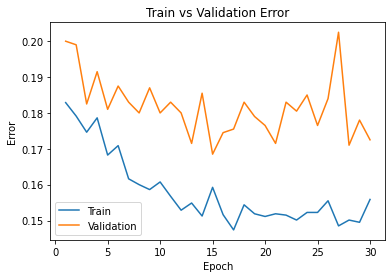

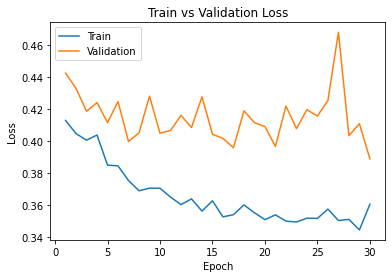

In [ ]:
#The training curve for small net
model_path = get_model_name("small", batch_size=64, learning_rate=0.01, epoch=29)
plot_training_curve(model_path)

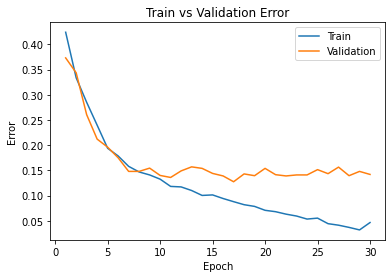

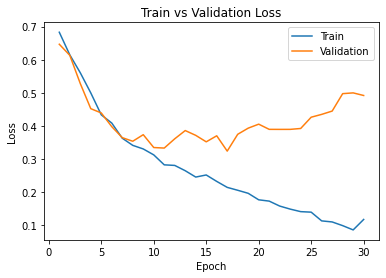

In [ ]:
#The training curve for large net
model_path = get_model_name("large", batch_size=64, learning_rate=0.01, epoch=29)
plot_training_curve(model_path)

### Part (f) - 3pt

Describe what you notice about the training curve.
How do the curves differ for `small_net` and `large_net`?
Identify any occurences of underfitting and overfitting.

**ANSWER:**
From the training curve plot for **small net** we can see that the model starts to **overfit** at around 5 epoch itself and both the training and validation errors and loss are **highly erratic/unstable** and starts increasing. 

For **Large net** the plot is much more stable compared to the small net but the model suffers from **overfitting** at around epoch 6 the validation loss starts increasing and the validation error stays almost constant. 


## Part 3. Optimization Parameters [4 pt]

For this section, we will work with `large_net` only.

### Part (a) - 1pt

Train `large_net` with all default parameters, except set `learning_rate=0.001`.
Does the model take longer/shorter to train?
Plot the training curve. Describe the effect of *lowering* the learning rate.

**ANSWER:**
By lowering the learning rate the model does **take longer to train** as the step towards the global minima decreases. We can also see that the model is no longer overfitting and is **performing much better** having its validation error and loss much closer to the training error and loss. 

In [ ]:
# Note: When we re-construct the model, we start the training
# with *random weights*. If we omit this code, the values of
# the weights will still be the previously trained values.
large_net = LargeNet()
train_net(large_net, batch_size=64, learning_rate=0.001, num_epochs=30)

Files already downloaded and verified
10000
Files already downloaded and verified
this is the test indices 2000
32
Epoch 1: Train err: 0.4585, Train loss: 0.6922090911865234 |Validation err: 0.4145, Validation loss: 0.6918484680354595
Epoch 2: Train err: 0.404, Train loss: 0.6912762837409974 |Validation err: 0.401, Validation loss: 0.6909310147166252
Epoch 3: Train err: 0.39125, Train loss: 0.6897973504066467 |Validation err: 0.3825, Validation loss: 0.6891596242785454
Epoch 4: Train err: 0.391, Train loss: 0.6871493883132934 |Validation err: 0.379, Validation loss: 0.6860428061336279
Epoch 5: Train err: 0.37275, Train loss: 0.6819084930419922 |Validation err: 0.3725, Validation loss: 0.6794121749699116
Epoch 6: Train err: 0.367, Train loss: 0.6722611665725708 |Validation err: 0.3745, Validation loss: 0.6701584309339523
Epoch 7: Train err: 0.367375, Train loss: 0.6595345559120178 |Validation err: 0.3785, Validation loss: 0.6627401951700449
Epoch 8: Train err: 0.36425, Train loss: 0.649

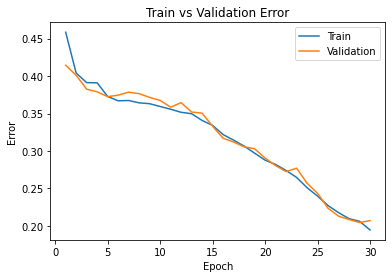

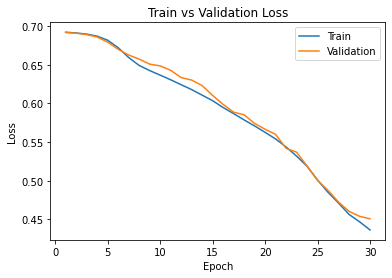

In [ ]:
model_path = get_model_name("large", batch_size=64, learning_rate=0.001, epoch=29)
plot_training_curve(model_path)

### Part (b) - 1pt

Train `large_net` with all default parameters, except set `learning_rate=0.1`. 
Does the model take longer/shorter to train?
Plot the training curve. Describe the effect of *increasing* the learning rate.

**ANSWER:**
By increasing the learning rate the model **does train a little faster** but the performance of the model is worse, as we can see that it started **underfitting the data**. Since the model is performing poorly on both the training and validation set.

In [ ]:
large_net = LargeNet()
train_net(large_net, batch_size=64, learning_rate=0.1, num_epochs=30)

Files already downloaded and verified
10000
Files already downloaded and verified
this is the test indices 2000
32
Epoch 1: Train err: 0.3435, Train loss: 0.6152465670108795 |Validation err: 0.2655, Validation loss: 0.5401884317398071
Epoch 2: Train err: 0.26275, Train loss: 0.5457514839172364 |Validation err: 0.2255, Validation loss: 0.47185863088816404
Epoch 3: Train err: 0.205125, Train loss: 0.4577759726047516 |Validation err: 0.196, Validation loss: 0.42472241446375847
Epoch 4: Train err: 0.18375, Train loss: 0.42987853920459745 |Validation err: 0.193, Validation loss: 0.4498207103461027
Epoch 5: Train err: 0.182875, Train loss: 0.4176621789932251 |Validation err: 0.1765, Validation loss: 0.3949774377979338
Epoch 6: Train err: 0.1775, Train loss: 0.407295166015625 |Validation err: 0.218, Validation loss: 0.47349493484944105
Epoch 7: Train err: 0.15425, Train loss: 0.36420914459228515 |Validation err: 0.1665, Validation loss: 0.3992267334833741
Epoch 8: Train err: 0.143125, Train l

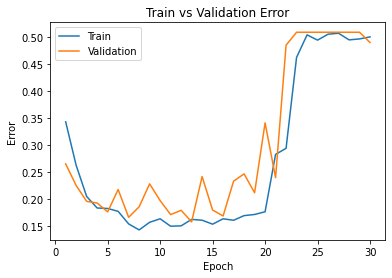

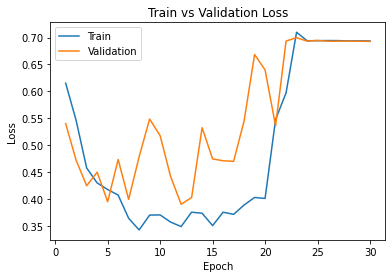

In [ ]:
model_path = get_model_name("large", batch_size=64, learning_rate=0.1, epoch=29)
plot_training_curve(model_path)

### Part (c) - 1pt

Train `large_net` with all default parameters, including with `learning_rate=0.01`.
Now, set `batch_size=512`. Does the model take longer/shorter to train?
Plot the training curve. Describe the effect of *increasing* the batch size.

**ANSWER:**
By increasing the batch size to 512 the model does take a **much shorter time** to train. From the plot, we can also see that the model is **performing well** on both the training and validation set.

In [ ]:
large_net = LargeNet()
train_net(large_net, batch_size=512, learning_rate=0.01, num_epochs=30)

Files already downloaded and verified
10000
Files already downloaded and verified
this is the test indices 2000
4
Epoch 1: Train err: 0.466, Train loss: 0.6923338621854782 |Validation err: 0.44, Validation loss: 0.6918952614068985
Epoch 2: Train err: 0.413, Train loss: 0.6914851702749729 |Validation err: 0.403, Validation loss: 0.6910877674818039
Epoch 3: Train err: 0.4035, Train loss: 0.6901152096688747 |Validation err: 0.3925, Validation loss: 0.6894860416650772
Epoch 4: Train err: 0.4, Train loss: 0.6876360848546028 |Validation err: 0.393, Validation loss: 0.686403214931488
Epoch 5: Train err: 0.373625, Train loss: 0.6824756488204002 |Validation err: 0.374, Validation loss: 0.6796957552433014
Epoch 6: Train err: 0.364375, Train loss: 0.6726636365056038 |Validation err: 0.3685, Validation loss: 0.6694183051586151
Epoch 7: Train err: 0.36475, Train loss: 0.6583152934908867 |Validation err: 0.3765, Validation loss: 0.659694567322731
Epoch 8: Train err: 0.365, Train loss: 0.648730266839

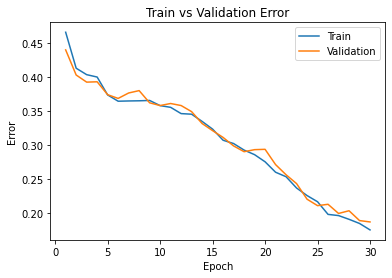

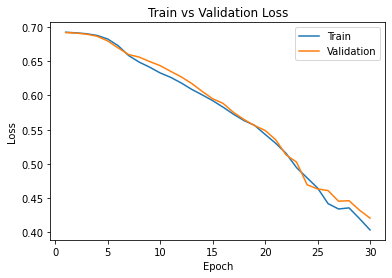

In [ ]:
model_path = get_model_name("large", batch_size=512, learning_rate=0.01, epoch=29)
plot_training_curve(model_path)

### Part (d) - 1pt

Train `large_net` with all default parameters, including with `learning_rate=0.01`.
Now, set `batch_size=16`. Does the model take longer/shorter to train?
Plot the training curve. Describe the effect of *decreasing* the batch size.

**ANSWER:**
By reducing the batch size to 16 the model takes a longer time to train. We can also see that both the training and validation error/loss started being nan as the learning rate and batch size being low. By increasing the learning rate we may see better results in the model.

In [ ]:
large_net = LargeNet()
train_net(large_net, batch_size=16, learning_rate=0.01, num_epochs=30)

Files already downloaded and verified
10000
Files already downloaded and verified
this is the test indices 2000
125
Epoch 1: Train err: 0.34375, Train loss: 0.6175165125727653 |Validation err: 0.2625, Validation loss: 0.540454069852829
Epoch 2: Train err: 0.22325, Train loss: 0.4730004854500294 |Validation err: 0.2035, Validation loss: 0.43918069565296175
Epoch 3: Train err: 0.25525, Train loss: nan |Validation err: 0.4905, Validation loss: nan
Epoch 4: Train err: 0.502375, Train loss: nan |Validation err: 0.4905, Validation loss: nan
Epoch 5: Train err: 0.502375, Train loss: nan |Validation err: 0.4905, Validation loss: nan
Epoch 6: Train err: 0.502375, Train loss: nan |Validation err: 0.4905, Validation loss: nan
Epoch 7: Train err: 0.502375, Train loss: nan |Validation err: 0.4905, Validation loss: nan
Epoch 8: Train err: 0.502375, Train loss: nan |Validation err: 0.4905, Validation loss: nan
Epoch 9: Train err: 0.502375, Train loss: nan |Validation err: 0.4905, Validation loss: nan

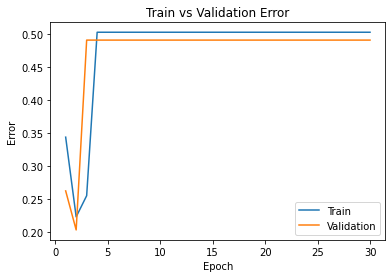

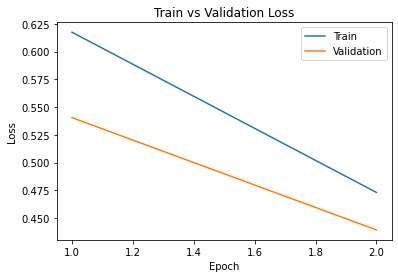

In [ ]:
model_path = get_model_name("large", batch_size=16, learning_rate=0.01, epoch=29)
plot_training_curve(model_path)

## Part 4. Hyperparameter Search [4 pt]

### Part (a) - 1pt

Based on the plots from above, choose another set of values for the hyperparameters (network, batch_size, learning_rate)
that you think would help you improve the validation accuracy. Justify your choice.

ANSWER:

From all the test conducted for the large net the best result was observed for the following hyperparameters batch size=32, lr=0.001 and epoch=30.

In [ ]:
large_net = LargeNet()
train_net(large_net, batch_size=32, learning_rate=0.001, num_epochs=30)

Files already downloaded and verified
10000
Files already downloaded and verified
this is the test indices 2000
63
Epoch 1: Train err: 0.43575, Train loss: 0.6917999017238617 |Validation err: 0.4005, Validation loss: 0.6908418952472626
Epoch 2: Train err: 0.391125, Train loss: 0.6885279052257538 |Validation err: 0.3825, Validation loss: 0.6861630422728402
Epoch 3: Train err: 0.369625, Train loss: 0.6772016158103943 |Validation err: 0.3715, Validation loss: 0.6702478244191125
Epoch 4: Train err: 0.364375, Train loss: 0.6550927977561951 |Validation err: 0.377, Validation loss: 0.6561524016516549
Epoch 5: Train err: 0.3655, Train loss: 0.640807126045227 |Validation err: 0.3675, Validation loss: 0.6468247288749331
Epoch 6: Train err: 0.353375, Train loss: 0.6287272845506668 |Validation err: 0.366, Validation loss: 0.6345798534060282
Epoch 7: Train err: 0.347625, Train loss: 0.6155831761360169 |Validation err: 0.352, Validation loss: 0.6205919034897335
Epoch 8: Train err: 0.33025, Train los

### Part (b) - 1pt

Train the model with the hyperparameters you chose in part(a), and include the training curve.

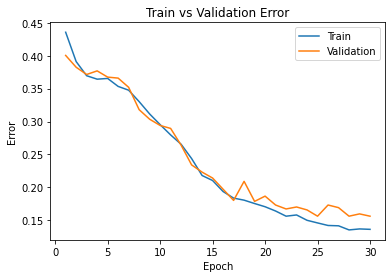

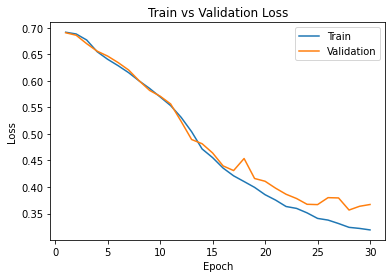

In [ ]:
model_path = get_model_name("large", batch_size=32, learning_rate=0.001, epoch=29)
plot_training_curve(model_path)

### Part (c) - 1pt

Based on your result from Part(a), suggest another set of hyperparameter values to try. 
Justify your choice.

ANSWER:

The validation curve for the above test wasn't bad but it was a little erratic and so the net was changed to small to check for any improvements in the validation error/loss. 

In [ ]:
small_net = SmallNet()
train_net(small_net, batch_size=32, learning_rate=0.001, num_epochs=30)

Files already downloaded and verified
10000
Files already downloaded and verified
this is the test indices 2000
63
Epoch 1: Train err: 0.4045, Train loss: 0.6711323871612549 |Validation err: 0.3585, Validation loss: 0.6474876242970663
Epoch 2: Train err: 0.360125, Train loss: 0.6394329895973205 |Validation err: 0.355, Validation loss: 0.6370734780553787
Epoch 3: Train err: 0.350875, Train loss: 0.6288767755031586 |Validation err: 0.345, Validation loss: 0.6266798197277008
Epoch 4: Train err: 0.34075, Train loss: 0.6187568914890289 |Validation err: 0.337, Validation loss: 0.6177071919516911
Epoch 5: Train err: 0.329625, Train loss: 0.6080960594415664 |Validation err: 0.331, Validation loss: 0.6070951989718846
Epoch 6: Train err: 0.320375, Train loss: 0.5953588771820069 |Validation err: 0.324, Validation loss: 0.5950613348256975
Epoch 7: Train err: 0.3065, Train loss: 0.5806794619560242 |Validation err: 0.3115, Validation loss: 0.5802497802272676
Epoch 8: Train err: 0.288875, Train loss:

### Part (d) - 1pt

Train the model with the hyperparameters you chose in part(c), and include the training curve.

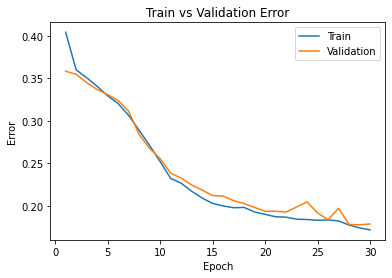

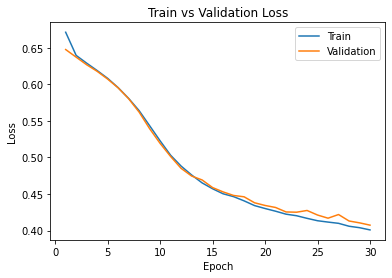

In [ ]:
model_path = get_model_name("small", batch_size=32, learning_rate=0.001, epoch=29)
plot_training_curve(model_path)

## Part 4. Evaluating the Best Model [9 pt]


### Part (a) - 1pt

Choose the **best** model that you have so far. This means choosing the best model checkpoint,
including the choice of `small_net` vs `large_net`, the `batch_size`, `learning_rate`, 
**and the epoch number**.

Modify the code below to load your chosen set of weights to the model object `net`.

In [ ]:
net = SmallNet()
model_path = get_model_name(net.name, batch_size=32, learning_rate=0.001, epoch=29)
state = torch.load(model_path)
net.load_state_dict(state)

<All keys matched successfully>

### Part (b) - 2pt

Justify your choice of model from part (a).

**ANSWER:**

The small net with the batch size = 32 and lr=0.001 and epoch=30 gives the best result in both training and validation error/loss. In addition, the model doesn't overfit, and it gives a much smoother curve than the large net did for the same hyperparameters.

### Part (c) - 2pt

Using the code in Part 0, any code from lecture notes, or any code that you write,
compute and report the **test classification error** for your chosen model.

In [ ]:
# If you use the `evaluate` function provided in part 0, you will need to 
# set batch_size > 1
train_loader, val_loader, test_loader, classes = get_data_loader(
    target_classes=["car", "truck"], 
    batch_size=64)

Files already downloaded and verified
10000
Files already downloaded and verified
this is the test indices 2000
32


In [ ]:
criterion = nn.BCEWithLogitsLoss()
err, loss = evaluate(net, val_loader, criterion)
print('The Average Error for validation set is: ',err)
print('The Average Loss for the validation set is: ',loss)

The Average Error for validation set is:  0.1785
The Average Loss for the validation set is:  0.4081646567210555


In [ ]:
criterion = nn.BCEWithLogitsLoss()
err, loss = evaluate(net, test_loader, criterion)
print('The Average Error for test set is: ',err)
print('The Average Loss for the test set is: ',loss)

The Average Error for test set is:  0.1815
The Average Loss for the test set is:  0.4128208262845874


### Part (d) - 2pt

How does the test classification error compare with the **validation error**?
Explain why you would expect the test error to be *higher* than the validation error.

**ANSWER:**

As expected, the test error is higher than the validation error as the model has not been exposed to the test dataset. It is not possible for the model to fit perfectly with the new dataset, and it is normal to see a little higher error value than the validation on the test set. If your model does poorly to the test set, then the model most likely overfit.  

### Part (e) - 2pt

Why did we only use the test data set at the very end?
Why is it important that we use the test data as little as possible?

**ANSWER:**

The test set is used at the very end to check the model's performance on an unknown dataset. If we were to use the test set to tune our model, then our model would learn it and end up converting the test set to training data. That is why it is important to use the validation set to tune the model and use the training set as little as possible at the end. 

## Part 5. Fully-Connected Linear ANN vs CNN [3 pt]

Test out a 3-layer linear fully-connected ANN architecture (see simpleANN below). You should explore different hyperparameter settings to determine how well you can do on the validation dataset. Once satisified with the performance, you may test it out on the test data.

How does the your best CNN model compare with an 2-layer linear ANN model (no convolutional layers) on classifying car and truck images?

ANSWER:

Here we can see that the 3 layer neural network performed poorly in classifying the images. We can see from the graph that it ended up overfitting the training data and did poorly on the validation set. In contrast, our 2-layer CNN model got a much better result, and it did exceptionally well on our test set as well.

In [ ]:
class simpleANN(nn.Module):
    def __init__(self):
        super(simpleANN, self).__init__()
        self.name = "simple"
        self.fc1 = nn.Linear(32*32*3, 100)
        self.fc2 = nn.Linear(100, 20)
        self.fc3 = nn.Linear(20, 1)

    def forward(self, x):
        x = x.view(-1, 32*32*3)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        x = x.squeeze(1) # Flatten to [batch_size]
        return x

In [ ]:
train_net(simpleANN(), batch_size=32, learning_rate=0.001, num_epochs=30)

Files already downloaded and verified
10000
Files already downloaded and verified
this is the test indices 2000
63
Epoch 1: Train err: 0.375, Train loss: 0.6546804795265198 |Validation err: 0.358, Validation loss: 0.6279703312449985
Epoch 2: Train err: 0.33625, Train loss: 0.610543285369873 |Validation err: 0.336, Validation loss: 0.6103944712214999
Epoch 3: Train err: 0.3045, Train loss: 0.5861500561237335 |Validation err: 0.304, Validation loss: 0.5897903570107051
Epoch 4: Train err: 0.281875, Train loss: 0.5598912945985794 |Validation err: 0.298, Validation loss: 0.5724812571018462
Epoch 5: Train err: 0.261875, Train loss: 0.5373452900648117 |Validation err: 0.2845, Validation loss: 0.5585725515607803
Epoch 6: Train err: 0.247, Train loss: 0.5147822613716125 |Validation err: 0.274, Validation loss: 0.5427933481950609
Epoch 7: Train err: 0.236625, Train loss: 0.4950461738109589 |Validation err: 0.271, Validation loss: 0.5351425480274927
Epoch 8: Train err: 0.221125, Train loss: 0.476

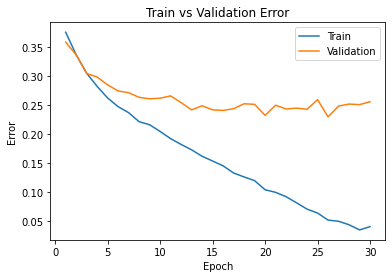

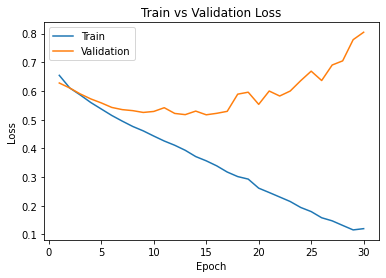

In [ ]:
model_path = get_model_name("simple", batch_size=32, learning_rate=0.001, epoch=29)
plot_training_curve(model_path)

In [ ]:
criterion = nn.BCEWithLogitsLoss()
err, loss = evaluate(simpleANN(), val_loader, criterion)
print('The Average Error for validation set is: ',err)
print('The Average Loss for the validation set is: ',loss)

The Average Error for validation set is:  0.5095
The Average Loss for the validation set is:  0.7065998073667288


In [ ]:
criterion = nn.BCEWithLogitsLoss()
err, loss = evaluate(simpleANN(), test_loader, criterion)
print('The Average Error for test set is: ',err)
print('The Average Loss for the test set is: ',loss)

The Average Error for test set is:  0.5
The Average Loss for the test set is:  0.6974956765770912


### Saving to HTML
Detailed instructions for saving to HTML can be found <a href="https://stackoverflow.com/questions/53460051/convert-ipynb-notebook-to-html-in-google-colab/64487858#64487858">here</a>. Provided below are a summary of the instructions:

(1) download your ipynb file by clicking on File->Download.ipynb

(2) reupload your file to the temporary Google Colab storage (you can access the temporary storage from the tab to the left)

(3) run the following:

In [ ]:
%%shell
jupyter nbconvert --to html LAB_1_ANN_and_PyTorch.ipynb

[NbConvertApp] Converting notebook LAB_1_ANN_and_PyTorch.ipynb to html
[NbConvertApp] Writing 1308543 bytes to LAB_1_ANN_and_PyTorch.html


(4) the html file will be available for download in the temporary Google Colab storage

(5) review the html file and make sure all the results are visible before submitting your assignment to Quercus